In [2]:
import numpy as np

In [27]:
import sys
sys.path.append('/home/g/Desktop/git/nodules/tf/')
sys.path.append('/home/g/Desktop/git/nodules/keras/')
import init
import kerasUtil as ku

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [29]:
from keras.models import load_model
sys.path.append('/home/g/Desktop/git/keras/keras/preprocessing/')
from image3D import ImageDataGenerator

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
f1 = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no1-loss-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))

In [32]:
f1a = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no1-acc-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))

In [33]:
f2 = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no3-loss-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))
f2a = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no3-loss-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))

In [34]:
f3 = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no5-loss-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))
f3a = np.memmap('/home/g/Desktop/git/nodules/out/051117/32-no5-loss-shape-1537-4-features-051117.dat',dtype='float32',shape=(1537,4))

In [35]:
cfg = ['/scr/nodules/no4/val/','/scr/nodules/no4/samples/train/']
images, labels = init.loadpng(cfg)
images, labels = ku.cleanData(images,labels)
labels = ku.get3Labels(labels)

In [36]:
x = np.c_[f1,f1a,f2,f2a,f3,f3a]
x = np.c_[f1[:,:1],f1a[:,:1],f2[:,:1],f2a[:,:1],f3[:,:1],f3a[:,:1]]
labels = labels[:,:2]

In [37]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfc = rfc.fit(x,labels)

In [38]:
print rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [14]:
cfg = ['/scr/nodules/no4/val/','/scr/nodules/no4/samples/val/']
images, labels = init.loadpng(cfg)
images, labels = ku.cleanData(images,labels)
testImages = ku.to3d(images,2)
testImages = ku.convertArray(testImages)
testLabels = ku.get3Labels(labels)

In [15]:
valgen = ImageDataGenerator(
  featurewise_center=True,
  featurewise_std_normalization=True,
  data_format='channels_first')
valgen.fit(testImages)

In [16]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no1-accuracy-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft1a = features

128/175 [====================>.........] - ETA: 0s

In [17]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no1-loss-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft1 = features

128/175 [====================>.........] - ETA: 0s

In [18]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no3-accuracy-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft2a = features

128/175 [====================>.........] - ETA: 0s

In [19]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no3-loss-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft2 = features

128/175 [====================>.........] - ETA: 0s

In [20]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no5-accuracy-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft3a = features

128/175 [====================>.........] - ETA: 0s

In [21]:
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no5-loss-051117.h5')
prob = model.predict_proba(testImages,batch_size=32)
classes = model.predict_classes(testImages,batch_size=32)
features = np.c_[prob,classes]
ft3 = features

128/175 [====================>.........] - ETA: 0s

In [39]:
testX = np.c_[ft1[:,:1],ft1a[:,:1],ft2[:,:1],ft2a[:,:1],ft3[:,:1],ft3a[:,:1]]

In [40]:
probs = rfc.predict_proba(testX)

In [41]:
print rfc.score(testX,testLabels[:,:2])

0.691428571429


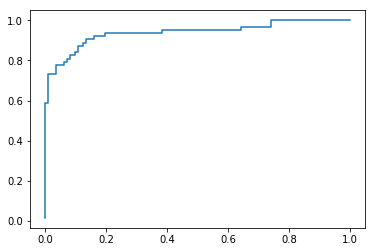

In [42]:
testLabels = np.asarray(testLabels)
group = (ft1a[:,:3]+ft2a[:,:3]+ft3a[:,:3])/3.
fpr, tpr, _ = roc_curve(testLabels[:,0],group[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [59]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100)
ada = ada.fit(x,labels)
scores = cross_val_score(ada, testX, testLabels[:,:2])

ValueError: bad input shape (1537, 2)